In [ ]:
#Q11

In [2]:
import pandas as pd
import statsmodels.api as sm
import numpy as np

df = pd.read_excel(r"C:\Users\91797\Downloads\Data analyst Data.xlsx", sheet_name="All Events Data")

df['Family Income'] = df['Family Income'].str.replace(' Lakh', '')  # Remove 'Lakh'
df['Family Income'] = df['Family Income'].str.replace(r'[^\d.-]', '', regex=True)  # Remove non-numeric characters
df['Family Income'] = df['Family Income'].apply(lambda x: np.mean([float(i) for i in x.split('-')]) if '-' in x else float(x))

df_cleaned = df.dropna(subset=['CGPA', 'Family Income', 'Experience with python (Months)', 'Expected salary (Lac)'])

X = df_cleaned[['CGPA', 'Family Income', 'Experience with python (Months)']]

X = sm.add_constant(X)

y = df_cleaned['Expected salary (Lac)']

model = sm.OLS(y, X).fit()

print(model.summary())


                              OLS Regression Results                             
Dep. Variable:     Expected salary (Lac)   R-squared:                       0.045
Model:                               OLS   Adj. R-squared:                  0.044
Method:                    Least Squares   F-statistic:                     33.97
Date:                   Mon, 06 Jan 2025   Prob (F-statistic):           1.89e-21
Time:                           14:17:22   Log-Likelihood:                -7004.3
No. Observations:                   2157   AIC:                         1.402e+04
Df Residuals:                       2153   BIC:                         1.404e+04
Df Model:                              3                                         
Covariance Type:               nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

In [ ]:
#Q13

  First Name         Email ID  Quantity                  Events  \
0     Dhiraj   dhiraj@xyz.com         1  Art of Resume Building   
1      punam    punam@xyz.com         1  Art of Resume Building   
2    Kanika    kanika@xyz.com         1  Art of Resume Building   
3    Madhuri  madhuri@xyz.com         1  Art of Resume Building   
4      Rehan    rehan@xyz.com         1  Art of Resume Building   

  Attendee Status                                       College Name  \
0       Attending       Don Bosco College of Engineering Fatorda Goa   
1       Attending          Vishwakarma Institute of Technology, Pune   
2       Attending  KLE Society's College of BCA, RLS Institute, B...   
3       Attending  G H Raisoni institut of engineering and techno...   
4       Attending                               St Xavier's College    

  How did you come to know about this event?  \
0                                      Email   
1                                   Whatsapp   
2                   

C:\Users\91797\AppData\Local\Temp\ipykernel_21628\2074134551.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Field_of_Study'] = df_cleaned['Experience with python (Months)'].apply(


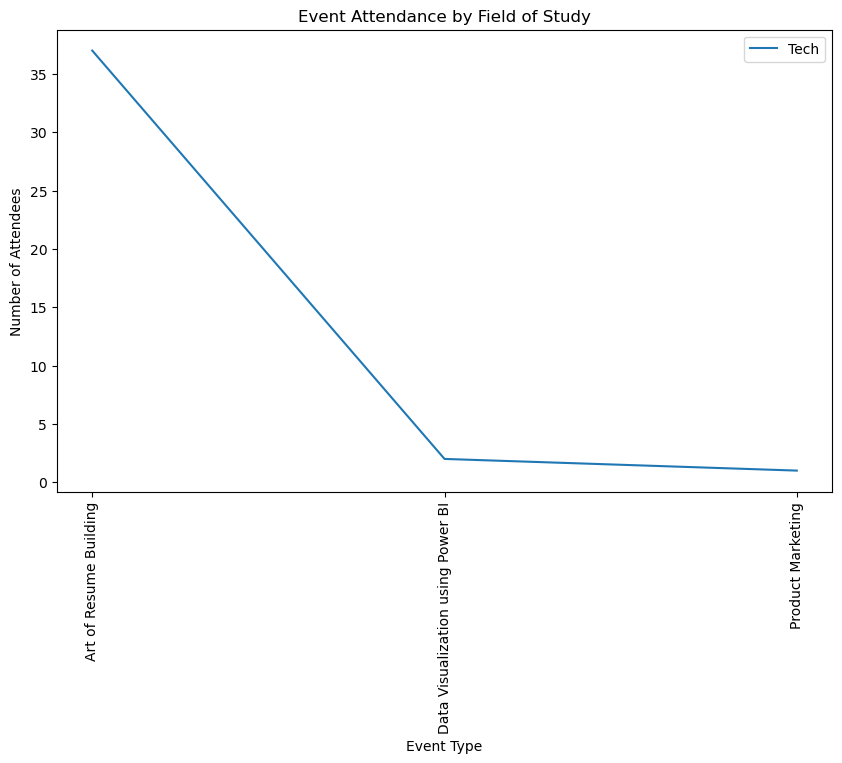

In [4]:
import pandas as pd

df = pd.read_excel(r"C:\Users\91797\Downloads\Data analyst Data.xlsx", sheet_name="All Events Data")

print(df.head())

df_cleaned = df.dropna()

df_cleaned['Field_of_Study'] = df_cleaned['Experience with python (Months)'].apply(
    lambda x: 'Tech' if x > 0 else 'Non-Tech'
)

event_attendance = df_cleaned.groupby(['Events', 'Field_of_Study']).size().reset_index(name='Attendees')

print(event_attendance)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for field in event_attendance['Field_of_Study'].unique():
    field_data = event_attendance[event_attendance['Field_of_Study'] == field]
    plt.plot(field_data['Events'], field_data['Attendees'], label=field)

plt.xlabel('Event Type')
plt.ylabel('Number of Attendees')
plt.legend()
plt.xticks(rotation=90)
plt.title('Event Attendance by Field of Study')
plt.show()


In [ ]:
#Q14 

In [15]:
import pandas as pd
from scipy.stats import ttest_ind

df = pd.read_excel(r"C:\Users\91797\Downloads\Data analyst Data.xlsx", sheet_name="All Events Data")

if 'Leadership- skills' not in df.columns:
    print("Leadership- skills column not found!")
else:
    leadership_students = df[df['Leadership- skills'] == 'Yes']
    non_leadership_students = df[df['Leadership- skills'] == 'No']

    t_stat_CGPA, p_value_CGPA = ttest_ind(leadership_students['CGPA'], non_leadership_students['CGPA'], nan_policy='omit')

    t_stat_salary, p_value_salary = ttest_ind(leadership_students['Expected salary (Lac)'], non_leadership_students['Expected salary (Lac)'], nan_policy='omit')

    print(f"CGPA Comparison (Leadership vs Non-Leadership):")
    print(f"T-statistic: {t_stat_CGPA}, P-value: {p_value_CGPA}")
    
    print(f"\nExpected Salary Comparison (Leadership vs Non-Leadership):")
    print(f"T-statistic: {t_stat_salary}, P-value: {p_value_salary}")

    if p_value_CGPA < 0.05:
        print("\nThere is a statistically significant difference in CGPA between students with and without leadership roles.")
    else:
        print("\nThere is no statistically significant difference in CGPA between students with and without leadership roles.")
    
    if p_value_salary < 0.05:
        print("There is a statistically significant difference in expected salary between students with and without leadership roles.")
    else:
        print("There is no statistically significant difference in expected salary between students with and without leadership roles.")


CGPA Comparison (Leadership vs Non-Leadership):
T-statistic: nan, P-value: nan

Expected Salary Comparison (Leadership vs Non-Leadership):
T-statistic: nan, P-value: nan

There is no statistically significant difference in CGPA between students with and without leadership roles.
There is no statistically significant difference in expected salary between students with and without leadership roles.


In [ ]:
#Q15

In [6]:

df = pd.read_excel(r"C:\Users\91797\Downloads\Data analyst Data.xlsx", sheet_name="All Events Data")

graduating_students_2024 = df[df['Year of Graduation'] == 2024]

num_graduating_students = graduating_students_2024.shape[0]

print(f"Number of students graduating by the end of 2024: {num_graduating_students}")


Number of students graduating by the end of 2024: 679


In [ ]:
#Q16

Promotion Channel Counts:
How did you come to know about this event?
Whatsapp                                                                                                 434
Email                                                                                                    227
Others                                                                                                    89
Cloud Counselage Website                                                                                  64
SPOC/ College Professor                                                                                   55
LinkedIn                                                                                                  27
Facebook                                                                                                  21
Youtube                                                                                                   17
Whatsapp | SPOC/ College Professor                         

C:\Users\91797\AppData\Local\Temp\ipykernel_12812\4055988965.py:25: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


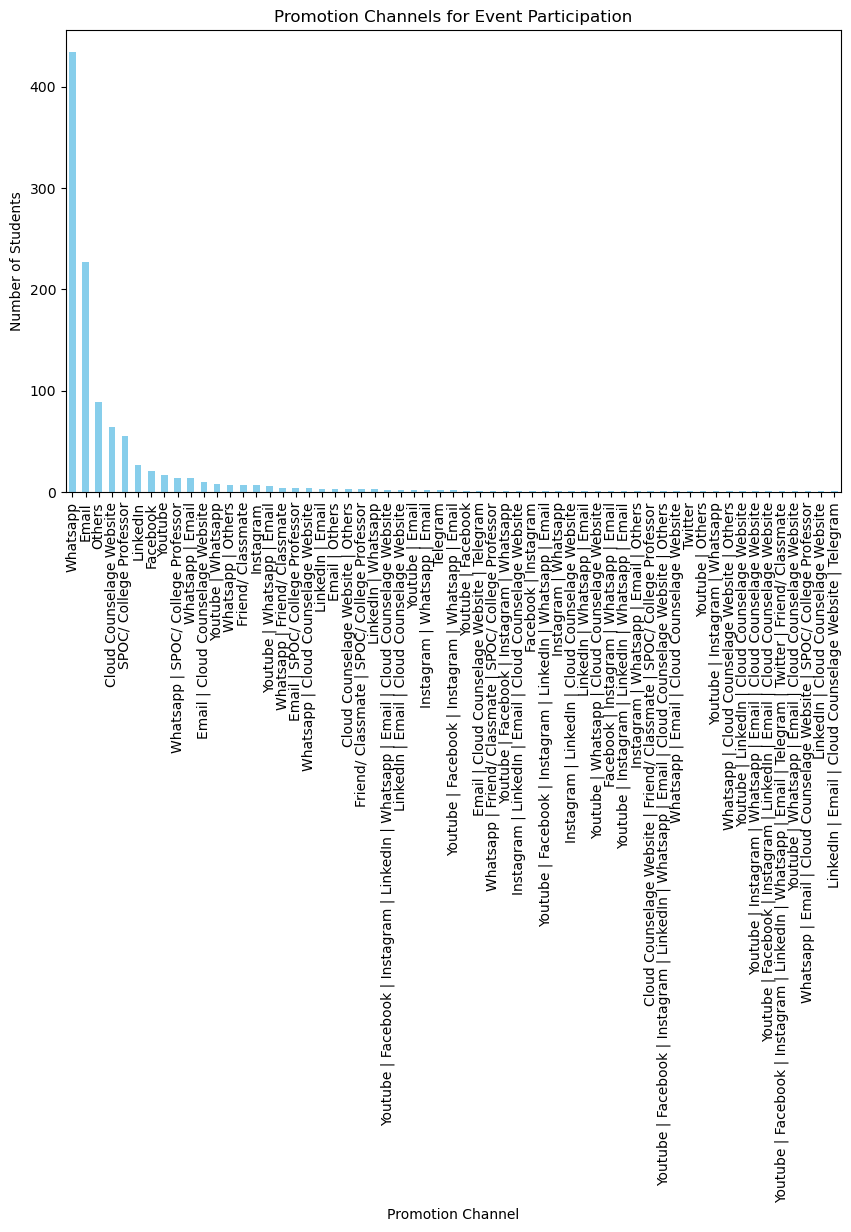

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel(r"C:\Users\91797\Downloads\Data analyst Data.xlsx", sheet_name="All Events Data")

promotion_column = 'How did you come to know about this event?'

promotion_counts = df[promotion_column].value_counts()

print("Promotion Channel Counts:")
print(promotion_counts)

plt.figure(figsize=(10, 6))
promotion_counts.plot(kind='bar', color='skyblue')
plt.title('Promotion Channels for Event Participation')
plt.xlabel('Promotion Channel')
plt.ylabel('Number of Students')
plt.xticks(rotation=90) C:\Users\91797\AppData\Local\Temp\ipykernel_21628\2074134551.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Field_of_Study'] = df_cleaned['Experience with python (Months)'].apply(
plt.tight_layout()
plt.show()


In [ ]:
#Q17 

In [8]:
import pandas as pd

df = pd.read_excel(r"C:\Users\91797\Downloads\Data analyst Data.xlsx", sheet_name="All Events Data")

data_science_keywords = ['data science', 'machine learning', 'artificial intelligence', 'ai', 'deep learning']

df_data_science = df[df['Events'].str.contains('|'.join(data_science_keywords), case=False, na=False)]

num_data_science_attendees = df_data_science.shape[0]

print(f"Number of students who attended Data Science-related events: {num_data_science_attendees}")


Number of students who attended Data Science-related events: 62


In [ ]:
#Q18

In [23]:
import pandas as pd

df = pd.read_excel(r"C:\Users\91797\Downloads\Data analyst Data.xlsx", sheet_name="All Events Data")

promotion_column = 'How did you come to know about this event?'

df_college_promotion = df[df[promotion_column].str.contains('college', case=False, na=False)]

num_students_college_promotion = df_college_promotion.shape[0]

print(f"Number of students who know about the event from college: {num_students_college_promotion}")

college_counts = df_college_promotion['College Name'].value_counts()

top_5_colleges = college_counts.head(5)

print("\nTop 5 colleges with the most students attending the event:")
print(top_5_colleges)


Number of students who know about the event from college: 79

Top 5 colleges with the most students attending the event:
College Name
vidyalankar institute of technology, mumbai                      5
don bosco college of engineering fatorda goa                     5
ld college of engineering, ahmedabad, gujarat                    5
silicon institute of technology                                  4
dkte society's textile and engineering institute ichalkaranji    4
Name: count, dtype: int64
